In [ ]:
# The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements.
# Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model
# that can learn from these measurements and accurately classify the Iris flowers into their respective species.
# Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.
# This dataset is widely used for introductory classification tasks.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
iris_data = pd.read_csv('IRIS.csv')

In [ ]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_data.shape

(150, 5)

In [ ]:
# Preprocess the data
X = iris_data.drop('species', axis=1)  # Features
y = iris_data['species']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the SVM classifier with hyperparameter tuning
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Train the model
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# Find the best parameters
best_svm = grid_search.best_estimator_

In [ ]:
# Evaluate the model's performance
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("\nAccuracy:", accuracy)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy: 0.9777777777777777


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



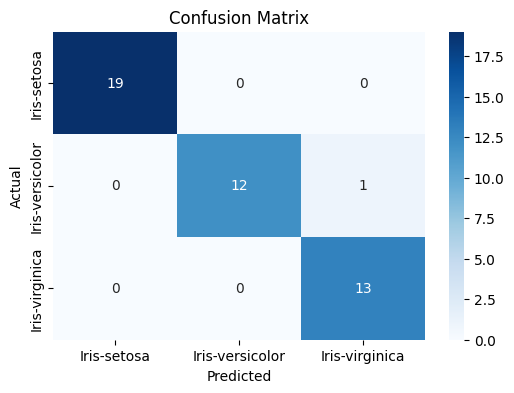

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris_data['species'].unique(), yticklabels=iris_data['species'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()